In [1]:
!pip install qiskit qiskit_ibm_runtime pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━

In [2]:
import warnings
warnings.filterwarnings("ignore")
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, Sampler

import qiskit as qs
import qiskit_ibm_runtime as qs_ibm
import math


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService

def read_token(filename="ibm_token.txt"):
    with open(filename, "r") as file:
        return file.readline().strip()

token = read_token()

QiskitRuntimeService.save_account(token=token, channel="ibm_quantum", overwrite=True)

service = QiskitRuntimeService()


In [ ]:
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_kyiv'

# Zadanie 1 - Problem Deutscha

Zaimplementuj kwantowe rozwiązanie podstawowego problemu Deutcha dla jedno-qbitowej funkcji na wybranym symulatorze . Podczas prezentacji rozwiązania należy umieć odpowiedzieć na pytania:

a) na czym polega problem Deutcha ?

b) gdzie są cztery bramki obliczeniowe Uf, do jakich grup należą?

c) gdzie (na którym qbicie) jest wynik i jak go interpretować? Czy się zgadza ?

d) (opcjonalnie) porównaj wyniki symulatora  z wynikami na prawdziwym urządzeniu kwantowym.


## Przykład z funkcją stałą
Zbudujmy układ rozwiązujący problem Deutscha gdy "w pudełku" jest funkcja stała.


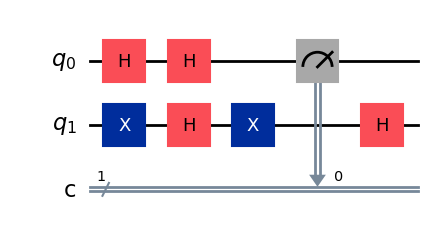

In [ ]:
qc_constant= QuantumCircuit(2, 1)

# negate the second qubit to answer our question
qc_constant.x(1)

qc_constant.h(0)
qc_constant.h(1)

#Create a constant f function (in our case f3)
qc_constant.x(1)

qc_constant.h(0)
qc_constant.h(1)

#measure on the 'input' qubit that should bring us answers
qc_constant.measure(0, 0)

qc_constant.draw('mpl')

In [ ]:
qc_transpiled = transpile(qc_constant, backend, optimization_level=3, seed_transpiler=0)

with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_transpiled], shots=100)
    result_simulator = job.result()


Wynik pomiaru: {'0': 100}


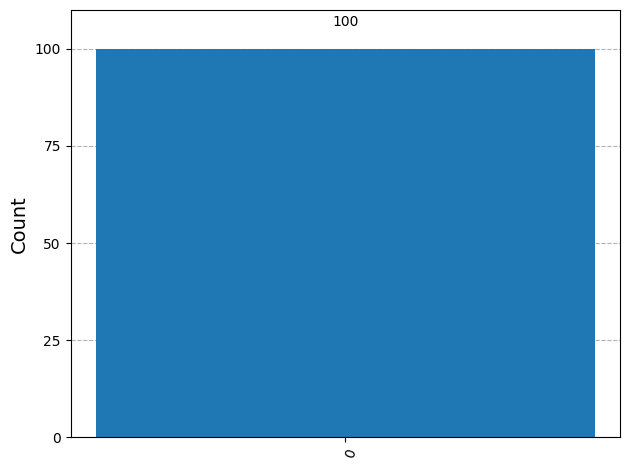

In [ ]:
binary_prob = result_simulator[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob)
plot_histogram(binary_prob)

## Przykład z funkcją zmienną
Zbudujmy układ kwantowy ze zmienną funkcją


In [4]:
backend = service.least_busy(simulator=False, operational=True)
backend.name

'ibm_kyiv'

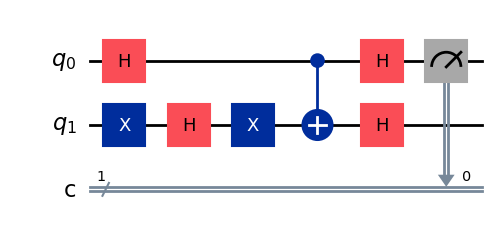

In [5]:
qc_balanced = QuantumCircuit(2, 1)

qc_balanced.x(1)

qc_balanced.h(0)
qc_balanced.h(1)

# Uf: f(x) = x (CNOT)
qc_balanced.x(1)
qc_balanced.cx(0, 1)

qc_balanced.h(0)
qc_balanced.h(1)

qc_balanced.measure(0, 0)

qc_balanced.draw('mpl')

In [6]:
qc_transpiled_b = transpile(qc_balanced, backend, optimization_level=3, seed_transpiler=0)

with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_transpiled_b], shots=100)
    result_simulator_b = job.result()


Wynik pomiaru: {'1': 100}


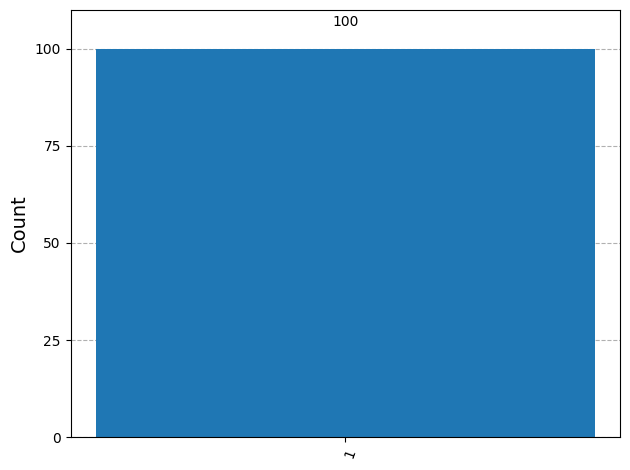

In [7]:
binary_prob_b = result_simulator_b[0].data.c.get_counts()
print("Wynik pomiaru:", binary_prob_b)
plot_histogram(binary_prob_b)

## a) Na czym polega problem Deutcha?

Problem Deutcha polega na rozstrzygnięciu, czy funkcja logiczna `f: {0,1} → {0,1}` jest:

- **stała** (constant), tzn. `f(0) = f(1)`
- **zróżnicowana** (balanced), tzn. `f(0) ≠ f(1)`

W klasycznym podejściu musimy obliczyć **dwa wyniki**: `f(0)` i `f(1)`, co wymaga dwóch zapytań. W podejściu kwantowym, dzięki wykorzystaniu kwantowej superpozycji i interferencji, wystarczy **jedno zapytanie** do funkcji `f` (po wykonaniu odpowiednich operacji na kwantowym komputerze), aby rozstrzygnąć, czy funkcja jest stała, czy zróżnicowana.

## b) Gdzie są cztery bramki Uf i do jakich grup należą?

Problem Deutcha dotyczy czterech możliwych funkcji `f`, które mogą być:

| Nazwa funkcji | `f(0)` | `f(1)` | Typ       | Operator Uf                     |
|---------------|--------|--------|-----------|----------------------------------|
| `f₀(x) = 0`   | 0      | 0      | constant  | Identity                 |
| `f₁(x) = 1`   | 1      | 1      | constant  | CNOT        |
| `f₂(x) = x`   | 0      | 1      | balanced  | X(y) + CNOT                             |
| `f₃(x) = ¬x`  | 1      | 0      | balanced  | X(y) |

Każda bramka `Uf` to operator kwantowy działający na dwóch qbitach:  
``|x⟩|y⟩ → |x⟩|y ⊕ f(x)⟩``

- **Stałe funkcje** (`f₀`, `f₁`) odpowiadają operatorom tożsamościowym lub negującym drugi qbit.
- **Funkcje zróżnicowane** (`f₂`, `f₃`) odpowiadają operacjom CNOT (kontrola na pierwszym qbiczie).

## c) Gdzie (na którym qbicie) jest wynik i jak go interpretować? Czy się zgadza?

Wynik jest odczytywany po pomiarze **pierwszego qbitu** (q0).

**Interpretacja**:
- **Wynik = 0** → funkcja jest **stała** (constant).
- **Wynik = 1** → funkcja jest **zróżnicowana** (balanced).

# Zadanie 2 - Problem Bernsteina-Vaziraniego

Zaimplementuj rozwiązanie klasyczne oraz kwantowe problemu Bernsteina-Vaziraniego na wybranym symulatorze. Podczas prezentacji rozwiązania należy umieć odpowiedzieć na pytania:

a)  na czym polega problem ?

b)  gdzie jest bramka obliczeniowa Uf dla problemu Bernsteina-Vaziraniego?

c)  w jaki sposób realizujemy rozwiązanie klasyczne, a w jaki kwantowe?

d)  gdzie (na których qbitach) otrzymujemy rozwiązanie klasyczne, a na których kwantowe ?  Ile wynosi i czy się zgadza ?

e)  (opcjonalnie) porównaj wyniki symulatora z wynikami na prawdziwym urządzeniu kwantowym.


In [8]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
import numpy as np

## Podejście klasyczne


In [57]:
def classical_solution(secret_number):
    num_bits = secret_number.bit_length()
    query = 0
    for i in range(num_bits):
        if (secret_number >> i) & 1:
            query |= (1 << i)
    return query

print(classical_solution(10110))

10110


## Podejście kwantowe

In [55]:

def oracle(qc, s, n):
    s_reverse = s[::-1]
    for q_index in range(n):
        if s_reverse[q_index] == '1':
            qc.cx(q_index, n)

def bernstein_vazirani(s):
    """Algorytm Bernsteina-Vaziraniego."""
    n = len(s)
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.barrier()
    for qubit in range(n+1):
        qc.h(qubit)
    qc.barrier()

    oracle(qc, s, n)
    qc.barrier()

    for qubit in range(n+1):
        qc.h(qubit)

    qc.barrier()

    qc.measure(range(n), range(n))

    return qc

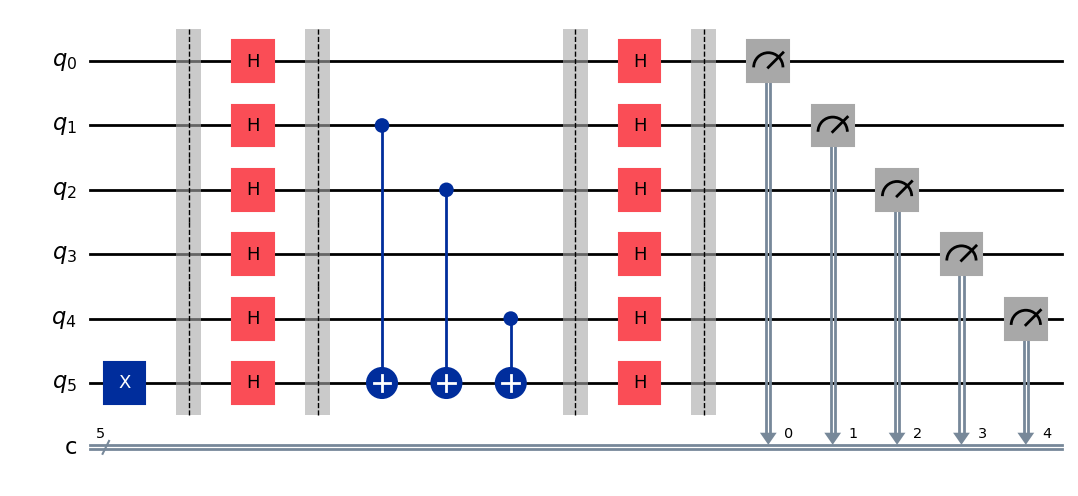

In [51]:
s = '10110'  # Ukryty ciąg bitów
n = len(s)
qc = bernstein_vazirani(s)
qc.draw('mpl')

In [52]:
backend = service.least_busy(simulator=False, operational=True)
print(f"Wybrany backend: {backend.name}")

qc_transpiled_bv = transpile(qc, backend=backend, optimization_level=3, seed_transpiler=0)

Wybrany backend: ibm_kyiv


In [53]:
with Batch(backend=backend):
    sampler = Sampler()
    job = sampler.run([qc_transpiled_bv], shots=100)
    result = job.result()

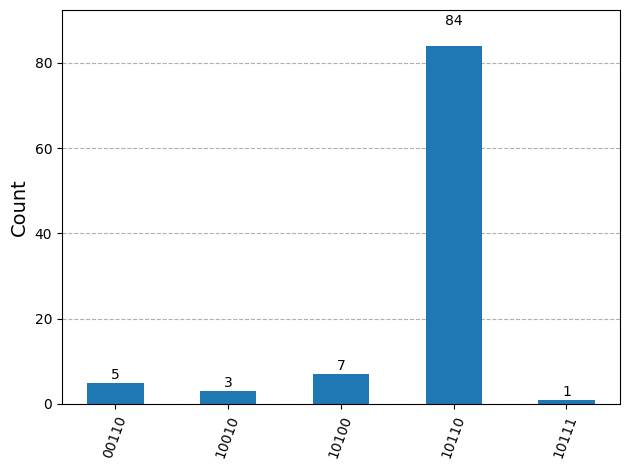

In [58]:
plot_histogram(result[0].data.c.get_counts())

### a) Na czym polega problem?
Problem Bernsteina-Vaziraniego polega na ustaleniu pewnej nieznanej liczby w kontekście funkcji przyjmującej n-bitowe wejście.

Dana jest funkcja f(x), gdzie x to n-bitowy wektor wejściowy, a wynik f to n-bitowe wyjście. Funkcja ta została stworzona w oparciu o nieznany n-bitowy ciąg s. Zależność ta opisana jest wzorem:
f(x) = x ⋅ s mod 2,
gdzie „⋅” oznacza iloczyn skalarny modulo 2. Celem jest ustalenie liczby s.

### b) Gdzie jest bramka obliczeniowa Uf dla problemu Bernsteina-Vaziraniego?
Bramka Uf to tzw. „oracle” w algorytmie Bernsteina-Vaziraniego — kwantowy komponent obwodu, który realizuje działanie funkcji f(x) w sposób unitarnej transformacji.

### c) W jaki sposób realizujemy rozwiązanie klasyczne, a w jaki kwantowe?
Podejście klasyczne polega na wielokrotnym sprawdzaniu wartości funkcji f dla różnych wejść x. Potrzeba aż n różnych zapytań, gdzie każde wejście zawiera inny pojedynczy bit ustawiony na 1. Dzięki analizie wyników tych zapytań można wywnioskować każdy bit nieznanej liczby s. Proces ten wymaga serii operacji logicznych i analizy odpowiedzi krok po kroku.

Podejście kwantowe znacznie przyspiesza ten proces. Dzięki zastosowaniu bramek Hadamarda i oracle’a Uf, algorytm przygotowuje stan superpozycji, a następnie poprzez interferencję kwantową uzyskuje w jednym kroku zakodowaną informację o s. Po przeprowadzeniu pomiaru na pierwszych n kubitach, natychmiast otrzymujemy poszukiwaną liczbę w postaci binarnej. Cały algorytm wykonuje się w czasie O(1), co daje mu znaczną przewagę nad rozwiązaniem klasycznym.